## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
studyDF = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
studyDF.head(12)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
# Checking the number of mice.
counts = studyDF.nunique()
num_mice = counts['Mouse ID']
counts

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

In [4]:
print('Total number of mice: ', num_mice)

Total number of mice:  249


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

studyDF[studyDF[['Mouse ID', 'Timepoint']].duplicated() == True]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
studyDF[studyDF['Mouse ID'] == 'g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanDF = studyDF[studyDF['Mouse ID'] != 'g989']

In [8]:
# Checking the number of mice in the clean DataFrame.
print('The number of mice in the cleaned study data is:')
cleanDF.nunique()['Mouse ID']

The number of mice in the cleaned study data is:


248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grpbyDrug = cleanDF.groupby('Drug Regimen')

tumorMean = grpbyDrug.mean()['Tumor Volume (mm3)']
tumorMedian = grpbyDrug.median()['Tumor Volume (mm3)']
tumorVar = grpbyDrug.var()['Tumor Volume (mm3)']
tumorStdev = grpbyDrug.std()['Tumor Volume (mm3)']
tumorSem = grpbyDrug.sem()['Tumor Volume (mm3)']

stats = pd.DataFrame({
    'Tumor Vol, Mean':tumorMean,
    'Tumor Vol, Median':tumorMedian,
    'Tumor Vol, Variance':tumorVar,
    'Tumor Vol, Std Dev':tumorStdev,
    'Tumor Vol, SEM':tumorSem
})

stats

,"Tumor Vol, Mean","Tumor Vol, Median","Tumor Vol, Variance","Tumor Vol, Std Dev","Tumor Vol, SEM"
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

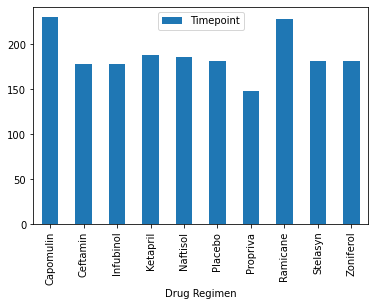

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timeBarPanda = pd.DataFrame(grpbyDrug.count()['Timepoint'])
timeBarPanda.plot.bar()


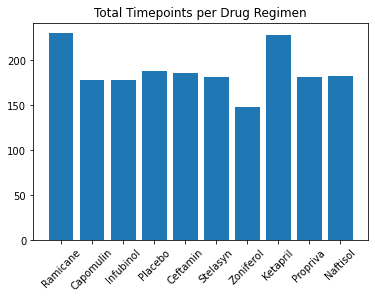

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

timeBarPlt = list(grpbyDrug.count()['Timepoint'])
drugs = list(cleanDF['Drug Regimen'].unique())
plt.bar(drugs, timeBarPlt)
plt.title('Total Timepoints per Drug Regimen')
plt.xticks(rotation = 45)
plt.show()

<AxesSubplot:ylabel='Count'>

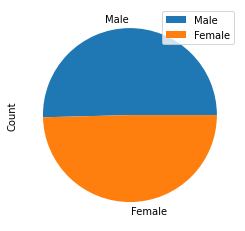

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
ID_df = cleanDF.drop_duplicates(subset=['Mouse ID'], keep='first')
MvsF = pd.DataFrame(ID_df.value_counts('Sex'))
MvsF.rename(columns = {0: 'Count'}, inplace = True)
MvsF.plot.pie(y='Count')

Sex
Male      125
Female    123
dtype: int64

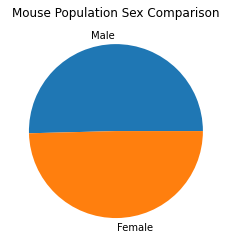

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

MtoF = ID_df.value_counts('Sex')
plt.pie(MtoF, labels=['Male','Female']) 
plt.title('Mouse Population Sex Comparison')

MtoF

## Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

CRIClist = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
CRIC = cleanDF[cleanDF['Drug Regimen'].isin(CRIClist)]


# Start by getting the last (greatest) timepoint for each mouse
maxTimes = pd.DataFrame(CRIC.groupby('Mouse ID')['Timepoint'].max())


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
maxCRIC = pd.merge(maxTimes, CRIC, on=['Mouse ID','Timepoint'], how='left')
maxCRIC

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


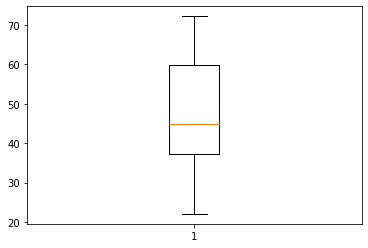

In [68]:
# Put treatments into a list for for loop (and later for plot labels)
drugs 

# Create empty list to fill with tumor vol data (for plotting)
tumorVol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
IQR = maxCRIC.quantile([.25,.75])
plt.boxplot(maxCRIC['Tumor Volume (mm3)'])
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
tumorCef = maxCRIC[maxCRIC['Drug Regimen']=='Ceftamin']['Tumor Volume (mm3)']    
tumorRam = maxCRIC[maxCRIC['Drug Regimen']=='Ramicane']['Tumor Volume (mm3)'] 
tumorInf = maxCRIC[maxCRIC['Drug Regimen']=='Infubinol']['Tumor Volume (mm3)'] 
tumorCap = maxCRIC[maxCRIC['Drug Regimen']=='Capomulin']['Tumor Volume (mm3)'] 

    # add subset 
    
    
    # Determine outliers using upper and lower bounds



In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
